In [1]:
import pandas as pd
import numpy as np
import requests
import json
from matplotlib import pyplot as plt

omdb_key = 'afd4c6'

## Sources
1. **Published by**	the-numbers.com; IMDb; Rotten Tomatoes; Business Insider
Publication date	April 2021
Original source	insider.com
ID	1072778

https://www.statista.com/statistics/1072778/highest-grossing-movie-annually-historical/

In [2]:
awards_file = "../the_oscar_award.csv"
topBoxoffice_file = "../boxoffice_all.csv"
yearTopBoxoffice_file = "../topBoxOffice_year.csv" # in 2017 dollars

In [3]:
award_df = pd.read_csv(awards_file)
award_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR IN A LEADING ROLE,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS IN A LEADING ROLE,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS IN A LEADING ROLE,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS IN A LEADING ROLE,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10390,2019,2020,92,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True
10391,2019,2020,92,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True
10392,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True
10393,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True


In [4]:
bestPicture = set(['BEST PICTURE','BEST MOTION PICTURE', 'OUTSTANDING MOTION PICTURE', 'OUTSTANDING PICTURE','OUTSTANDING PRODUCTION'])
test = [category in bestPicture for category in award_df.category]

In [5]:
movie_df = award_df[test & (award_df.winner == True)].sort_values('year_ceremony').reset_index(drop = True)

In [71]:
movie_df = movie_df[["year_film", "film"]]

In [72]:
movie_df

,year_film,film
0,1927,Wings
1,1928,The Broadway Melody
2,1929,All Quiet on the Western Front
3,1930,Cimarron
4,1931,Grand Hotel
...,...,...
87,2015,Spotlight
88,2016,Moonlight
89,2017,The Shape of Water
90,2018,Green Book


In [7]:
def getInfo(name, year = ''):
    url = "http://www.omdbapi.com/?t=" + name
    if year != "":
        url += "&y=" + str(year)
        
    api_key = "&apikey=" + omdb_key

    try:
        response = requests.get(url + name + api_key).json()
    except:
        print(f"did not find{url}")
    return response

def getBoxoffice(x):
    boxoffice = x['BoxOffice']
    boxoffice = boxoffice.replace(',', '')
    boxoffice = boxoffice.replace('$', '')
    try:
        value = int(boxoffice)
    except: 
        value = 0
        
    return value

In [73]:
result = [getBoxoffice(getInfo(x, y)) for x, y in zip(movie_df['film'], movie_df['year_film'])]

In [74]:
movie_df['BoxOffice'] = result

<ipython-input-74-ae33e454333c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['BoxOffice'] = result


In [75]:
movie_df

,year_film,film,BoxOffice
0,1927,Wings,0
1,1928,The Broadway Melody,0
2,1929,All Quiet on the Western Front,0
3,1930,Cimarron,0
4,1931,Grand Hotel,0
...,...,...,...
87,2015,Spotlight,45055776
88,2016,Moonlight,27854932
89,2017,The Shape of Water,63859435
90,2018,Green Book,85080171


In [78]:
#remove the movies with out a box office value
box_df = movie_df[movie_df['BoxOffice'] > 0]

columns = ["Year", "Title", "Box Office"]

In [80]:
box_df.columns = columns
box_df

,Year,Title,Box Office
11,1939,Gone with the Wind,200852579
15,1943,Casablanca,4108411
16,1944,Going My Way,16300000
18,1946,The Best Years of Our Lives,23650000
20,1948,Hamlet,4708156
...,...,...,...
87,2015,Spotlight,45055776
88,2016,Moonlight,27854932
89,2017,The Shape of Water,63859435
90,2018,Green Book,85080171


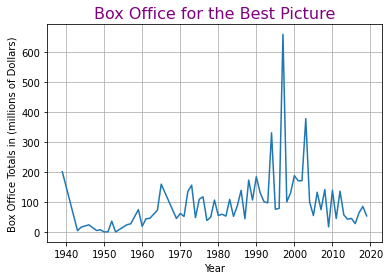

In [81]:
#plot the boxoffice for the winning movie 
plt.plot(box_df.Year, box_df['Box Office']/1e6)
plt.title("Box Office for the Best Picture",size=16, color="purple")
plt.xlabel("Year")
plt.ylabel("Box Office Totals in (millions of Dollars)")
plt.grid(True)
plt.show()

In [84]:
# show the top ten movies by boxoffice
top_box = box_df.sort_values('Box Office', ascending = False).reset_index(drop= True)
top_box.head(15)

,Year,Title,Box Office
0,1997,Titanic,659363944
1,2003,The Lord of the Rings: The Return of the King,377845905
2,1994,Forrest Gump,330455270
3,1939,Gone with the Wind,200852579
4,2000,Gladiator,187705427
5,1990,Dances With Wolves,184208848
6,1988,Rain Man,172825435
7,2001,A Beautiful Mind,170742341
8,2002,Chicago,170687518
9,1965,The Sound of Music,159287539


In [15]:
boxoffice_alltime = pd.read_csv(topBoxoffice_file)
toptop = float(boxoffice_alltime.iloc[0,2].replace(",","").replace("$",""))/ 1e6
topname = boxoffice_alltime.iloc[0,1]

In [16]:
boxoffice_alltime.head(10)

,rank,Title,Total Boxoffice,year
0,1,Avatar,"$2,847,246,203",2009
1,2,Avengers: Endgame,"$2,797,501,328",2019
2,3,Titanic,"$2,201,647,264",1997
3,4,Star Wars: Episode VII - The Force Awakens,"$2,068,455,677",2015
4,5,Avengers: Infinity War,"$2,048,359,754",2018
5,6,Jurassic World,"$1,670,516,444",2015
6,7,The Lion King,"$1,657,870,986",2019
7,8,The Avengers,"$1,518,815,515",2012
8,9,Furious 7,"$1,515,255,622",2015
9,10,Frozen II,"$1,450,026,933",2019


In [17]:
boxoffice_byyear = pd.read_csv(yearTopBoxoffice_file)

In [18]:
boxoffice_byyear

,year,Title,boxoffice,in dollars
0,2021,"Hi, Mom",821.42,821420000
1,2020,The Eight Hundred,461.34,461340000
2,2019,Avengers: Endgame,"2,797.5",2797500000
3,2018,Avengers: Infinity War,"2,048.36",2048360000
4,2017,Star Wars: Episode VIII - The Last Jedi,"1,332.54",1332540000
...,...,...,...,...
102,1919,The Miracle Man**,3,3000000
103,1918,Mickey**,17.2,17200000
104,1917,A Romance of the Redwoods**,0.42,420000
105,1916,Joan the Woman**,1.32,1320000



```pandas
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
```

In [55]:
try:
    boxoffice_byyear = boxoffice_byyear.drop("boxoffice",axis = 1)
except:
    print("already Dropped")
winners = box_df[["year_film", 'film', "BoxOffice"]]


winner_boxoffice = winners.merge(boxoffice_byyear, left_on="year_film", right_on= "year", how = 'left')
winner_boxoffice['Both'] = winner_boxoffice.film.str.lower() == winner_boxoffice.Title.str.lower()

col_Winners = "Oscar Winners"
col_boxoffice = "Box Office Winners"
col_year = "Year"
col_title = "Title"
col_revenue = "Gross Revenue"
cols = [(col_Winners,col_year), (col_Winners,col_title),(col_Winners,col_revenue),
        (col_boxoffice,col_year), (col_boxoffice,col_title),(col_boxoffice,col_revenue),("","Both")]
winner_boxoffice.columns = pd.MultiIndex.from_tuples(cols)

already Dropped


In [56]:
winner_boxoffice

Oscar Winners                                             \
            Year                        Title Gross Revenue   
0           1939           Gone with the Wind     200852579   
1           1943                   Casablanca       4108411   
2           1944                 Going My Way      16300000   
3           1946  The Best Years of Our Lives      23650000   
4           1948                       Hamlet       4708156   
..           ...                          ...           ...   
64          2015                    Spotlight      45055776   
65          2016                    Moonlight      27854932   
66          2017           The Shape of Water      63859435   
67          2018                   Green Book      85080171   
68          2019                     Parasite      53369749   

   Box Office Winners                                              \
                 Year                                       Title   
0                1939                          Gone With the Wind   
1                1943                          This is the Army**   
2                1944                              Going My Way**   
3                1946                           Song of the South   
4                1948                             The Snake Pit**   
..                ...                                         ...   
64               2015  Star Wars: Episode VII - The Force Awakens   
65               2016                  Captain America: Civil War   
66               2017     Star Wars: Episode VIII - The Last Jedi   
67               2018                      Avengers: Infinity War   
68               2019                           Avengers: Endgame   

                         
   Gross Revenue   Both  
0      402350000   True  
1       20830000  False  
2       16300000  False  
3       37460000  False  
4       10000000  False  
..           ...    ...  
64    2068220000  False  
65    1153300000  False  
66    1332540000  False  
67    2048360000  False  
68    2797500000  False  

[69 rows x 7 columns]

In [57]:
winner_boxoffice[col_Winners][col_year]

0     1939
1     1943
2     1944
3     1946
4     1948
      ... 
64    2015
65    2016
66    2017
67    2018
68    2019
Name: Year, Length: 69, dtype: int64

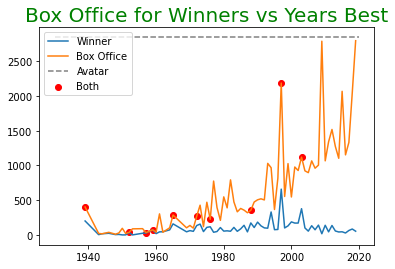

In [70]:
plt.plot(winner_boxoffice[col_Winners][col_year] ,winner_boxoffice[col_Winners][col_revenue] / 1e6,label='Winner')
plt.plot(winner_boxoffice[col_boxoffice][col_year] ,winner_boxoffice[col_boxoffice][col_revenue]/1e6,label='Box Office')
both = winner_boxoffice[winner_boxoffice[""]["Both"]]
plt.hlines(toptop,xmin=1930, xmax=2020,color='gray',linestyle='dashed',label=topname)
plt.scatter(both[col_boxoffice][col_year], both[col_boxoffice][col_revenue]/1e6,color='red',label="Both")

plt.legend()
plt.title("Box Office for Winners vs Years Best", color="green", size = 20)
plt.show()

In [69]:
winner_boxoffice.columns

MultiIndex([(     'Oscar Winners',          'Year'),
            (     'Oscar Winners',         'Title'),
            (     'Oscar Winners', 'Gross Revenue'),
            ('Box Office Winners',          'Year'),
            ('Box Office Winners',         'Title'),
            ('Box Office Winners', 'Gross Revenue'),
            (                  '',          'Both')],
           )